## Introduction to SVM(Support Vector Machines)

Welcome to today's exploration of Support Vector Machines, or SVMs. These remarkable algorithms are the backbone of machine learning, excelling in classification, regression, and even outlier detection tasks.<br/>
What makes SVMs truly versatile is their ability to perform both linear and non-linear classification. The magic happens with the kernel trick, allowing SVMs to implicitly map inputs into high-dimensional feature spaces.<br/>
In this video, we'll unravel the power of SVMs, diving into the fascinating world of linear and non-linear classification

## SVM terminology.

- **HyperPlane**: The decisive boundary, the line that separates our data points into different classes.
- **Support Vectors**: Support vectors are the data points that define the hyperplane margin in SVM models. They are the closest training samples that determine the optimal separating hyperplane between classes.
- **Margin**: This is the gap between the hyperplane and the nearest data points(Support Vectors).

### Image1
![Image description](multiple_hyperplanes.png)
### Image2
![Image description](optimal_hyperplane.png)

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

## Kernal Trick

A kernel is a function that transforms the inputs into a set of features that allow better separation of classes.<br/>
In the context of SVMs, there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel.<br/>
**Linear Kernal**: Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.
![Image description](linear_kernal.png)
<br/><br/>
**Polynomial Kernel**: This kernel can model non-linear relationships by adding polynomial terms to the linear kernel. It considers not just the features but their combinations too.
![Image description](polynomial_kernel.png)
<br/><br/>
**Radial Basis Functon(RBF) Kernel**: This kernel can model complex non-linear relationships by using a Gaussian function to measure the similarity between two points.Usefull when we do not know much about the data.<br/><br/><br/><br/>
**Sigmoid kernel**: This kernel can model neural networks by using a sigmoid function to measure the similarity between two points. We can use it as the proxy for neural networks.
![](sigmoidkernel.jpeg)

### Dataset description
The dataset is useful to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. This has only Female gender data.

**Key Features:**

- Pregnancies: Number of pregnancies.
- Glucose: Blood glucose level.
- BloodPressure: Blood pressure measurements.
- SkinThickness: Skin thickness measurement.
- Insulin: Insulin level.
- BMI (Body Mass Index): A measure of body fat.
- DiabetesPedigreeFunction: A function that represents the diabetes hereditary risk.
- Age: Age of the individual.
- Outcome: Our target variable 1 indicates diabetes, 0 indicates no diabetes.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratory data analysis 

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

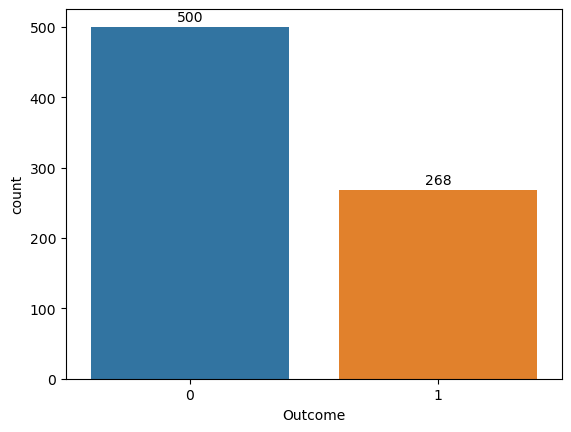

In [7]:
ax =sns.countplot(x=df['Outcome'], label = "Count")
for p in ax.patches:

    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),

    ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),

    textcoords='offset points')
plt.show()

> There is a imbalance in the data. Which might lead to bias in prediction. Hence to overcome this we need to balance this. We can use Scikit-Learn libraries to balance this.

In [8]:
df_majority=df[df['Outcome']==0]
df_minority=df[df['Outcome']==1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df[df['Outcome']==0]), random_state=123) 
df=pd.concat([df_majority,df_minority_upsampled],axis=0)

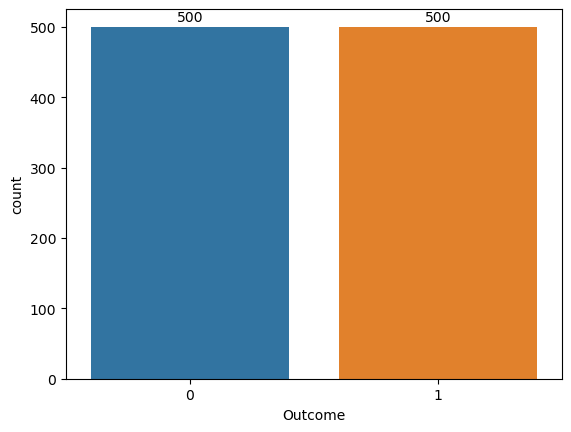

In [9]:
ax =sns.countplot(x=df['Outcome'], label = "Count")
for p in ax.patches:

    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),

    ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),

    textcoords='offset points')
plt.show()

> Now there is a balance in the data.

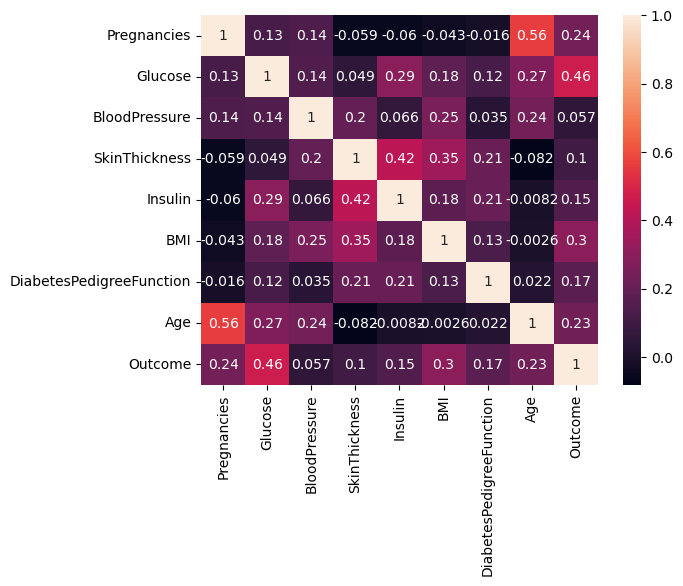

In [10]:
sns.heatmap(df.corr(), annot=True) 
plt.show()

> We can observe from the heatmap no column in higly positively correlated to our Target variable.

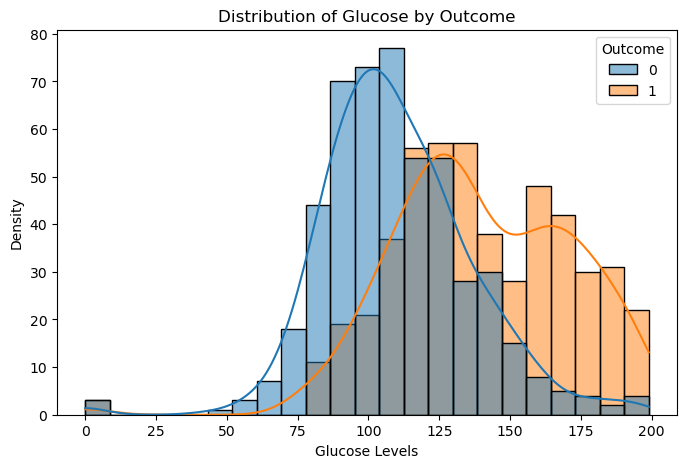

In [11]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)
plt.xlabel('Glucose Levels')
plt.ylabel('Density')
plt.title('Distribution of Glucose by Outcome')
plt.show()

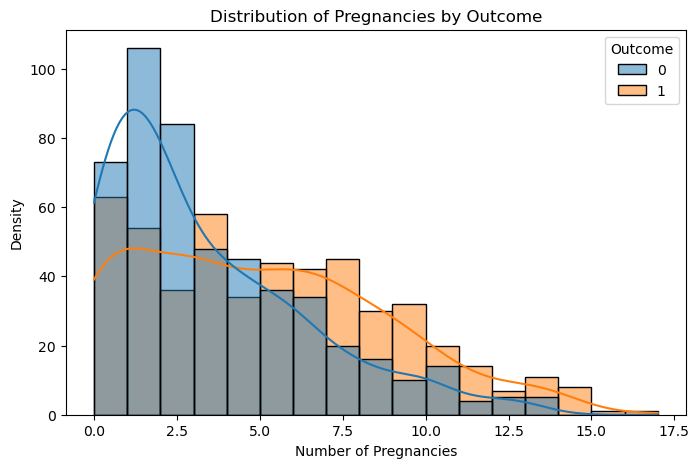

In [12]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Density')
plt.title('Distribution of Pregnancies by Outcome')
plt.show()

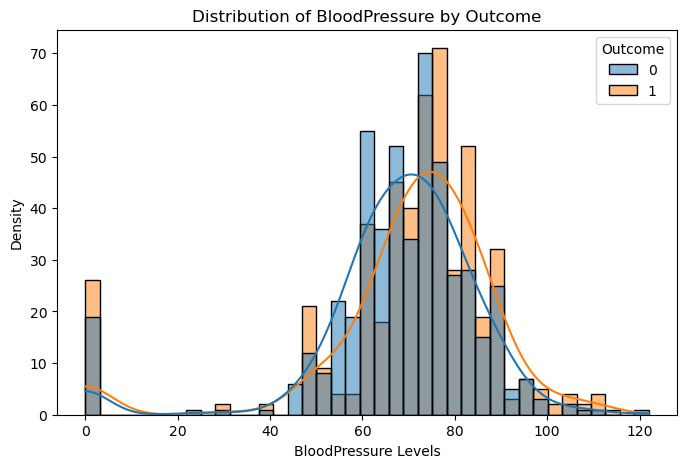

In [13]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True)
plt.xlabel('BloodPressure Levels')
plt.ylabel('Density')
plt.title('Distribution of BloodPressure by Outcome')
plt.show()

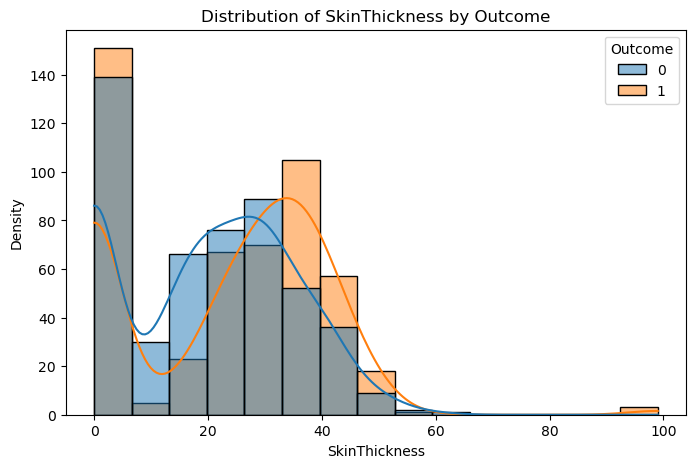

In [14]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='SkinThickness', hue='Outcome', kde=True)
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.title('Distribution of SkinThickness by Outcome')
plt.show()

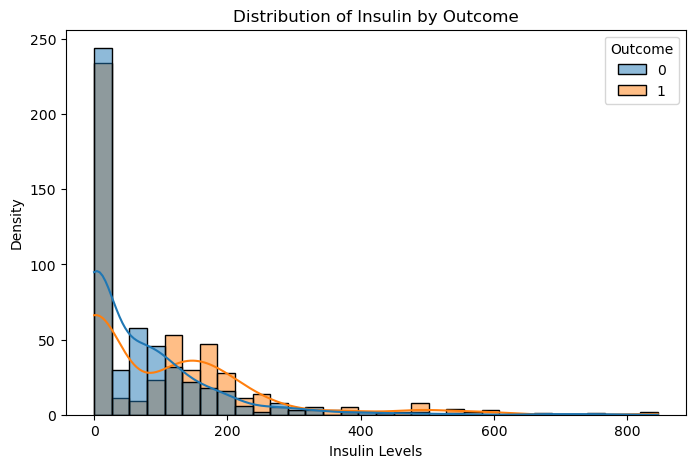

In [15]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True)
plt.xlabel('Insulin Levels')
plt.ylabel('Density')
plt.title('Distribution of Insulin by Outcome')
plt.show()

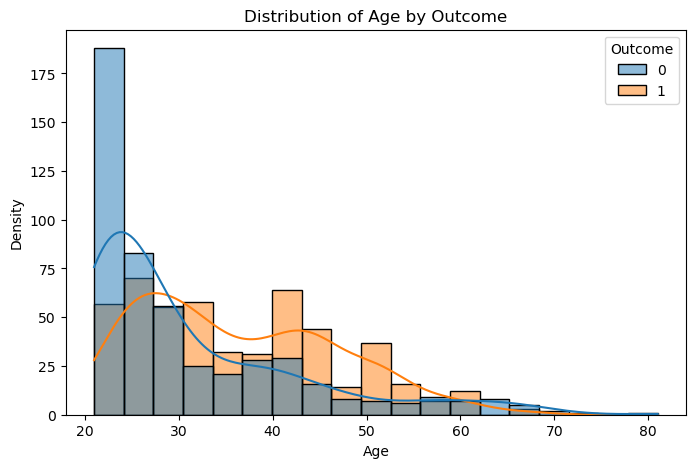

In [19]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Outcome')
plt.show()

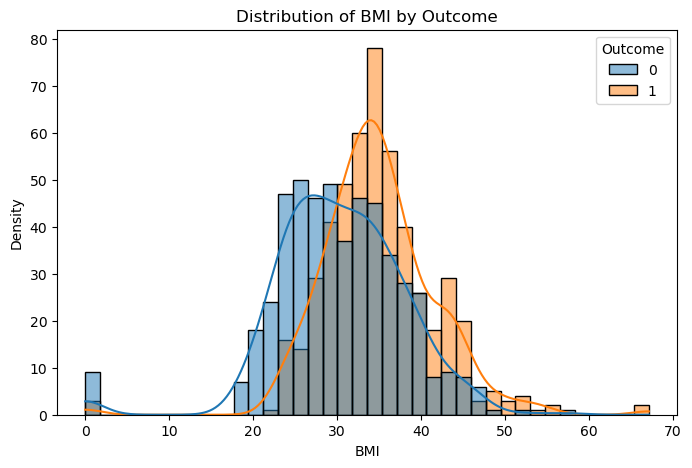

In [16]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI by Outcome')
plt.show()

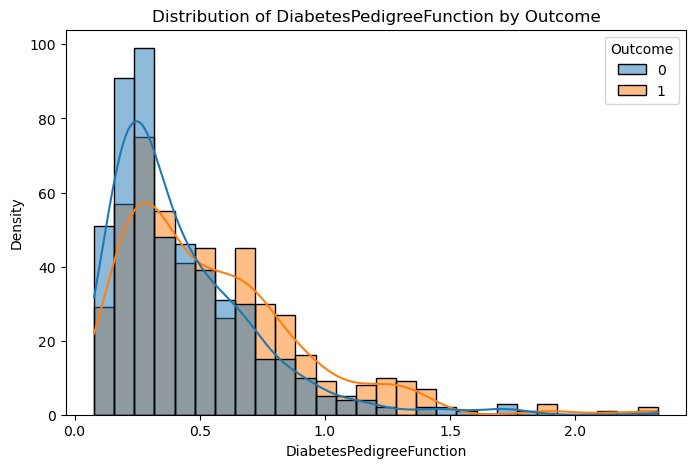

In [18]:
plt.figure(figsize=(8, 5)) 
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Density')
plt.title('Distribution of DiabetesPedigreeFunction by Outcome')
plt.show()

<Axes: >

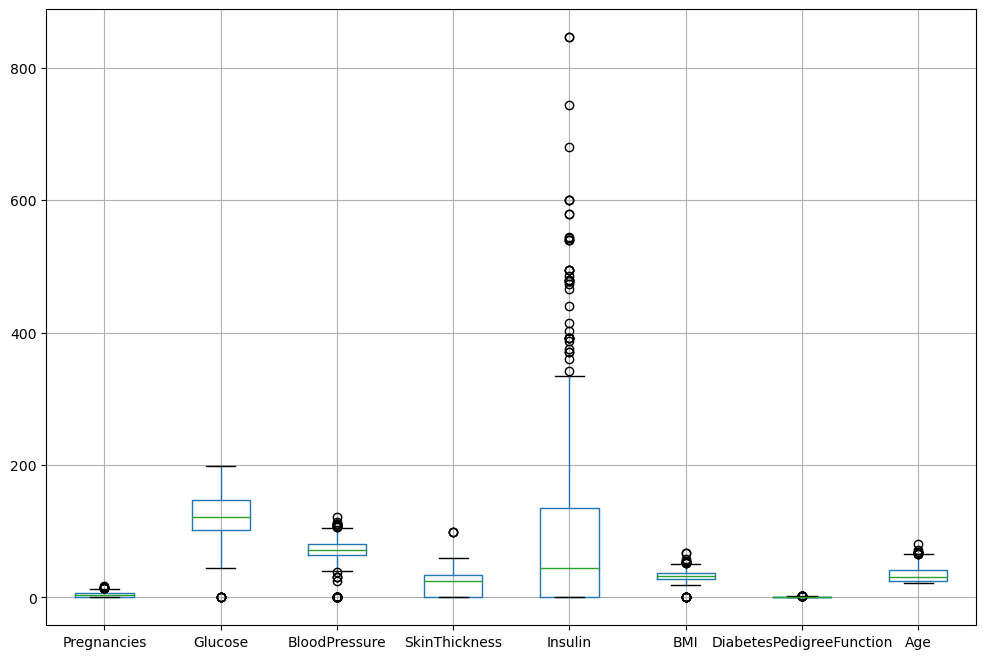

In [20]:
plt.figure(figsize=(12,8))
df.drop(['Outcome'], axis=1).boxplot()

There are two flavors of Support Vector Machines (SVMs): the hard-margin variant and the soft-margin variant.

**Hard-Margin Variant:**
The hard-margin variant of SVM is strict about classifying every training point correctly with a margin of at least 1. It aims to find a hyperplane with the maximum margin, giving no room for misclassifications. However, this approach is sensitive to outliers and doesn't handle them well.

**Soft-Margin Variant:**
On the other hand, the soft-margin variant of SVM allows for a more lenient approach. It accepts that a few points might be misclassified or have a margin less than 1. However, for each such point, a penalty is imposed in the form of the C parameter. The C parameter acts as a control on outliers – a low C allows more outliers, and a high C reduces their influence.

**Choosing C hyperparameter for Outliers:**
Given that our dataset contains outliers, opting for the soft-margin variant is sensible. Setting a high value for C during model training indicates a strict stance against outliers, essentially telling the SVM to prioritize correct classifications even if it means a few missteps.

## Splitting Data into Train and Test

In [21]:
X = df.drop(['Outcome'], axis=1)

y = df['Outcome']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [23]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## SVM with default HyperParameters

In [25]:
svc=SVC() #by default rbf kernel will be used
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') 
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7850
Recall: 0.7850
Precision: 0.7863
F1 Score: 0.7847


### setting C=100.0 as there are outliers

In [27]:
svc=SVC(C=100.0) #by default rbf kernel will be used
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') 
precision = precision_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8400
Recall: 0.8400
Precision: 0.8421
F1 Score: 0.8397


In [28]:
svc=SVC(C=1000.0) #by default rbf kernel will be used
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') 
precision = precision_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8500
Recall: 0.8500
Precision: 0.8643
F1 Score: 0.8483


> Increasing C value,improved performance across all metrics

## SVM with linear kernal

In [29]:
linear_svc=SVC(kernel='linear') 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7500
Recall: 0.7500
Precision: 0.7505
F1 Score: 0.7499


In [30]:
linear_svc=SVC(kernel='linear',C=1000.0) 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7650
Recall: 0.7650
Precision: 0.7653
F1 Score: 0.7650


## SVM with poly kernal

In [31]:
linear_svc=SVC(kernel='poly') 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7300
Recall: 0.7300
Precision: 0.7401
F1 Score: 0.7276


In [32]:
linear_svc=SVC(kernel='poly',C=1000.0) 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7700
Recall: 0.7700
Precision: 0.7742
F1 Score: 0.7693


## SVM with sigmoid kernal

In [33]:
linear_svc=SVC(kernel='sigmoid') 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6350
Recall: 0.6350
Precision: 0.6354
F1 Score: 0.6344


In [34]:
linear_svc=SVC(kernel='sigmoid',C=1000.0) 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6300
Recall: 0.6300
Precision: 0.6309
F1 Score: 0.6289


## Hyperparameter Tuning

In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C': [0.1, 1, 10, 100,1000],  
              'gamma': [0.00001,'scale', 'auto'],
              'kernel': ['rbf', 'poly','linear','sigmoid']}  

grid = GridSearchCV(SVC(), param_grid, scoring="accuracy", cv=skf, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Best parameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.799
Accuracy: 0.8500
Recall: 0.8500
Precision: 0.8643
F1 Score: 0.8483
